# Introdução 

Este notebook contempla o segundo projeto do curso de Data Science 1 da Udacity, e tem o objetivo didático de explorar dados de passageiros e tripulantes do Titanic com o foco na descoberta de fatos relevantes que os dados possam revelar e sua relação com a tragédia. Os dados foram baixados da plataforma da Udacity e foram retirados do [site do Kaggle](https://www.kaggle.com/c/titanic/data). 

**Autor**:  Luan Gabriel Silva Fernandes 

**Email**:  luangabriel70@gmail.com

**Github com este trabalho** : [repositório de lgabs](https://github.com/lgabs/udacity-titanic)

# 1. Visão Geral dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')

Podemos verificar no site do Kaggle citado acima a explicação de cada atributo (coluna), reproduzida abaixo:

| Variable | Definition | Key |
| --- | --- | --- |
| survival	| Survival	| 0 = No, 1 = Yes |
|pclass	|Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex |	Sex |	|
| Age | Age in years |	|
|sibsp | # of siblings / spouses aboard the Titanic| |	
| parch	| # of parents / children aboard the Titanic | |	
| ticket | Ticket number |	|
|fare |	Passenger fare| |	
|cabin | Cabin number | |	
| embarked | Port of Embarkation| C = Cherbourg, Q = Queenstown, S = Southampton|

Além disso, o site dá algumas notas explicativas: 

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

Percebe-se que as variáveis `pclass`, `survived` e `embarked` são categóricas e usam as "chaves" descritas na tebela anterior. Vamos ter uma visão geral das colunas, dos tipos de dados e das estatísticas básicas:

In [2]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Aqui, nota-se a presença de algumas variáveis adicionais: 'PassengerId' (índice de referência do passageiro) e 'Name' (nome do passageiro). 

# 2. *Brainstorming* de Perguntas 

### 1. Quais fatores tem maior correlação com a propensão de algumas pessoas sobreviverem? Quais variáveis são dependentes e quais são independentes? 
### 2. Sobrevivência, sexo e idade
    2.1 Qual sexo teve maior fração de sobreviventes em relação ao total da amostra?
    2.2 Observando a distribuição de idades e propondo categorias de idade (ex: jovens, adultos e idosos), podemos entender como cada uma delas sobreviveu em relação às demais?
    2.3 Combinando as categorias criadas acima e as diferenças de sexo, podemos identificar qual categoria de idade e sexo mais teve "êxito" na sobrevivência? Há alguma explicação plausível para esse resultado?
### 3. Sobrevivência e classe social (avaliada pela proxy "ticket class")
    3.1 Dentre os sobreviventes, qual classe social teve maior "êxito"? E qual teve o pior?
    3.2 Qual a resposta da pergunta acima para os não-sobreviventes?
    3.3 As respostas das duas perguntas anteriores são plausíveis, dadas as separações físicas das classes no Titanic? 
    3.4 Qual sexo é "dominante" em cada classe de sobreviventes?
    3.5 Qual a média de preço paga por cada classe?
### 4. Sobrevivência e família
    4.1 O fato de certas pessoas terem a bordo mais parentes (de qualquer tipo) influenciou na sobrevivência das mesmas?
### 5. Sobrevivência e Local de Embarque
    5.1 Quantos são os sobreviventes por local de embarque? Esse fator parece ter alguma relação _de fato_ com a propensão de uma pessoa sobreviver? 
### 6. Baseando-se nas análises anteriores em conjunto com a primeira questão, quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?

# 3. Limpeza dos Dados 

Vamos investigar os dados para encontrar formas de "limpá-lo":

### Valores Nulos e Atributos Relevantes

Vejamos que atributos possuem valores faltantes e as respectivas quantidades:

In [3]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Aqui notamos dados faltantes para `Age`, `Embarked` e `Cabin`. Para a nossa análise (a partir das perguntas levantadas no tópico 2), percebe-se que a informação de cabines não é relevante (já temos a informação de tipo de classe de cabine em `Pclass`). Quanto à idade e cidade de embarque, são variáveis pertinentes à análise, portanto quando formos lidar com elas, teremos que tomar apenas os valores não nulos. 

Além disso, o atributo `PassengerId` não é relevante, posto que é idêntico ao próprio `index` do DataFrame. O atributo `Ticket` também não é relevante, pois as principais informações que poderíamos tirar da passagem de cada pessoa já são dadas pelo preço pago (`Fare`) e tipo de classe de viagem (`Pclass`). Por fim, `Name` também não é relevante, pois é (em tese) um valor único para cada pessoa e portanto não comparáveis (já temos outros dados que são comparáveis). Assim, vamos descartar as colunas irrelevantes para nossa análise (para evitar dúvidas, vamos primeiro verificar se não há duas pessoas com o mesmo nome, usando o método any() e vendo se é `False`):

In [4]:
df_titanic.duplicated().any()

False

In [5]:
df_titanic.drop(['PassengerId', 'Cabin', 'Ticket', 'Name'], axis=1, inplace = True)

Vejamos o resultado:

In [6]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Temos um dataframe apenas com as colunas de interessse para a análise.

### Valores Duplicados

Na célula [21] notamos que não há nenhuma linha duplicada.

### Adequação de Tipos de Dados

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
df_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


Pelos tipos de dados mostrados acima e olhando exemplos de linhas, todos os atributos tem tipo de dados coerente, não sendo necessário nenhuma mudança de tipo.

### Simplificando as labels das colunas 

Vamos tornar as labels minúsculas e substituir espaços por _underscores_

In [9]:
df_titanic.rename(columns = lambda s: s.strip().lower(), inplace = True)

Vejamos o resultado:

In [10]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Pronto! Chegamos a um dataframe menor em colunas (891 linhas e 8 colunas) e simplificado para responder às perguntas propostas. Vamos, por último, confirmar que não "perdemos" nenhuma linha e contar as colunas com as quais vamos trabalhar:

In [11]:
df_titanic.shape

(891, 8)

De fato, mantivemos as 891 pessoas da amostra.

# 4. Exploração dos Dados 

Vamos seguir a divisão de perguntas propostas no tópico 3:

### P1. Quais fatores tem maior correlação com a propensão de algumas pessoas sobreviverem? Quais variáveis são dependentes e quais são independentes?

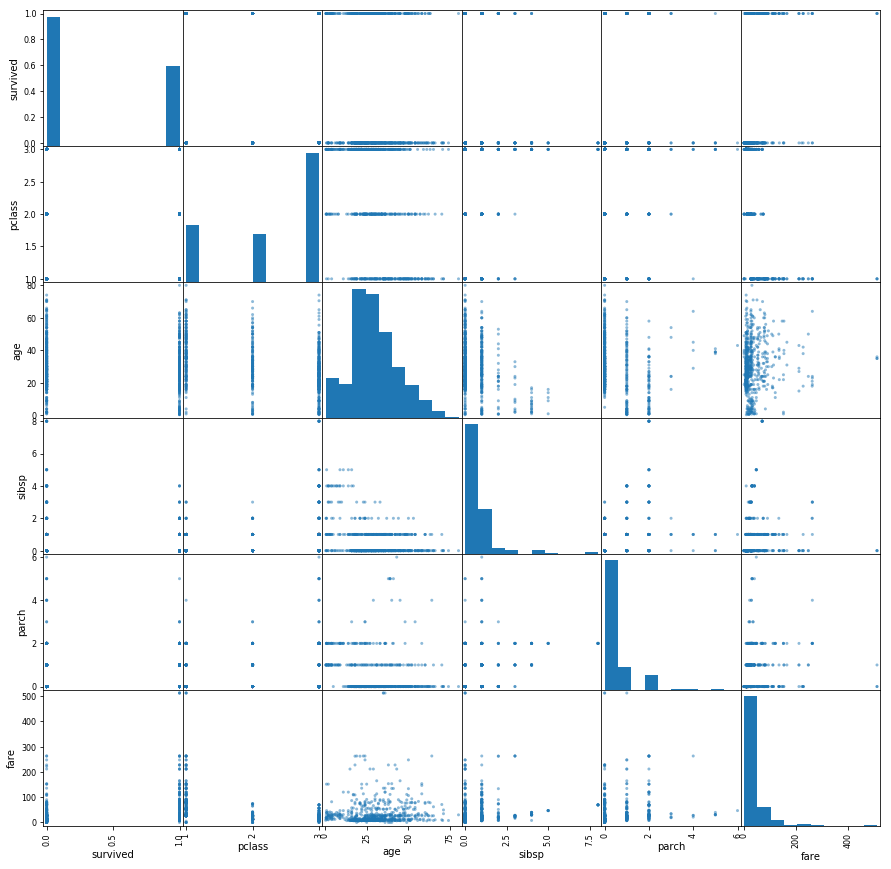

In [12]:
pd.plotting.scatter_matrix(df_titanic, figsize = (15,15));

In [13]:
df_titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Na nossa análise, a variável que pode ser interpretada como _dependente_ é a `survived`, pois estamos buscando fatores que tenham maior influência (e correlação) na propensão à sobrevivência das pessoas embarcadas no Titanic. Assim, as demais variáveis são, nesta análise, _independentes_ a priori. Observando a matriz de correlação (plotada e numérica) acima, notamos que os fatores de maior influência sobre a sobrevivência (valor de correlação mais próximo de 1) são:

a) `pclass`: correlação negativa

Isso significa que quanto maior o valor da variável `pclass` (de `1` a `3`, ou seja, da 1ª Classe para a 3ª Classe), menor seria a variável `survived`. Mesmo esta sendo uma variável binária, poderiamos, a grosso modo, interpretar essa relação negativa como uma maior chance de não sobreviver, ou seja, de se ter `survived = 0`. 

Embora a análise apenas com correlação seja muito preliminar e não conclusiva, isso faz bastante sentido, pois no Titanic a primeira classe ficava em decks superiores às segunda e terceira classes, aumentando as chances dos passageiros de primeira classe conseguirem fugir. A figura a seguir mostra a distribuição das classes no Titanic (retirados dos links a seguir): 

["Enciclopédia" do Titanic: Perfil do Navio](https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html)

["Enciclopédia" do Titanic: Class and Gender"](https://www.encyclopedia-titanica.org/class-gender-titanic-disaster-1912~chapter-2.html)


<img src="figure-one-side-view-l.jpeg">

b) `fare`:   correlação positiva

Aqui teríamos uma interpretação de que tarifas de viagem mais altas levam a maiores valores de `survived`, ou seja, maior seria a propensão à sobrevivência. Isso faz sentido pois usualmente as maiores tarifas ocorrem para a primeira classe, e isso também é confirmado pela considerável correlação negativa entre `pclass` e `fare` (lembrando que quanto maior `pclass`, pior a classe, ou seja há correlação _positiva_ entre tarifa e SES).

Entretanto, ainda é preciso avaliar melhor os dados para tirar conclusões mais sólidas, principalmente porque `survived` é uma variável binária.

### P2. Sobrevivência, sexo e idade
   #### P2.1 Qual sexo teve maior fração de sobreviventes em relação ao total da amostra?
   

Vamos criar um subconjunto (dataframe) onde só existem sobreviventes (`survived = 1`)

In [14]:
df_titanic_surv = df_titanic.query('survived == 1')

In [15]:
df_titanic_surv.groupby('sex').agg('count')

,survived,pclass,age,sibsp,parch,fare,embarked
sex,,,,,,,
female,233,233,197,233,233,233,231
male,109,109,93,109,109,109,109


Notamos que só existem dois valores para `sex`: "female" e "male". Vamos obter as frações e plotar:

In [16]:
float(df_titanic_surv.query('sex == "female"')['sex'].value_counts())

233.0

In [17]:
frac_males = 100/(float(df_titanic_surv.query('sex == "female"')['sex'].value_counts())/float(df_titanic_surv.query('sex == "male"')['sex'].value_counts())+1)
frac_females = 100 - frac_males
sex_fractions = [frac_males, frac_females]

In [18]:
type(frac_males)

float

In [19]:
print("Assim, as porcentagens de sobreviventes por sexo são:\n{:2.2f} Homens\n{:2.2f} Mulheres".format(frac_males, frac_females))

Assim, as porcentagens de sobreviventes por sexo são:
31.87 Homens
68.13 Mulheres


Vamos plotar os dados anteriores em um gráfico de barras:

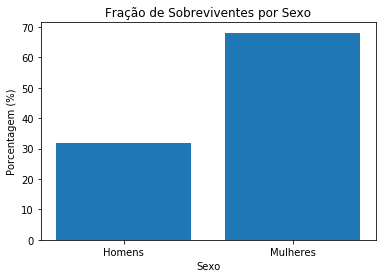

In [20]:
x_types = ['Homens', 'Mulheres']
x_positions = list(range(len(x_types))) 
plt.bar(x_positions, sex_fractions)
plt.xlabel('Sexo')
plt.ylabel('Porcentagem (%)')
plt.xticks(x_positions, x_types)
plt.title('Fração de Sobreviventes por Sexo');


Logo, o sexo feminino teve maior parcela entre os sobreviventes, alcançando quase 70% de representação.

#### P2.2 Observando a distribuição de idades e propondo categorias de idade (ex: jovens, adultos e idosos), podemos entender como cada uma delas sobreviveu em relação às demais?

Anteriormente, notamos que para `age` existem valores faltantes. Por isso, precisamos avaliar, nesta e na próxima pergunta, um dataframe sem essas linhas.

In [21]:
df_titanic_with_ages = df_titanic_surv[pd.notnull(df_titanic_surv['age'])]

In [22]:
df_titanic_with_ages['age'].isnull().any()

False

In [23]:
df_titanic_with_ages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 1 to 889
Data columns (total 8 columns):
survived    290 non-null int64
pclass      290 non-null int64
sex         290 non-null object
age         290 non-null float64
sibsp       290 non-null int64
parch       290 non-null int64
fare        290 non-null float64
embarked    288 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 20.4+ KB


Vamos começar observando o histograma de idades:

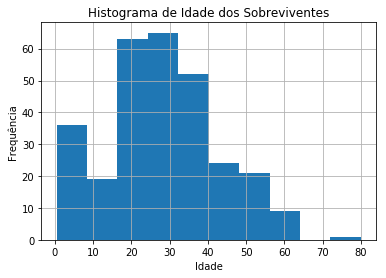

In [87]:
df_titanic_with_ages.hist(column = 'age')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma de Idade dos Sobreviventes');

Notamos que é uma distribuição distorcida para à direita mas com um outro pico entre as crianças mais novas (0 a 10 anos), com média em cerca de 25 anos. Vamos criar três categorias: `menores` (0 a 18 anos), `adultos` (18 a 60 anos) e `idosos` (acima de 60 anos). Vamos usar o método `cut()` do pandas e criar uma nova coluna:

In [25]:
bins = [0,18, 60,max(df_titanic_surv['age'])]
age_labels = ['minor', 'adult', 'elder']
column_agegroup = pd.cut(df_titanic_with_ages['age'], bins, labels = age_labels)
#df_titanic_with_ages.loc[:, 'age_group'] = pd.cut(df_titanic_with_ages['age'], bins, labels = age_labels)


In [26]:
df_titanic_with_ages = df_titanic_with_ages.assign(age_group = column_agegroup)

Vejamos para alguma linha o valor de `age_group` foi nulo (devido a erros):

In [27]:
df_titanic_with_ages['age_group'].isnull().any()

False

Perfeito, todos os valores são não nulos. Vamos observar o aspecto desta nova coluna, agrupar por categorias dela e plotar:

In [28]:
df_titanic_with_ages.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_group
1,1,1,female,38.0,1,0,71.2833,C,adult
2,1,3,female,26.0,0,0,7.9250,S,adult
3,1,1,female,35.0,1,0,53.1000,S,adult
8,1,3,female,27.0,0,2,11.1333,S,adult
9,1,2,female,14.0,1,0,30.0708,C,minor
10,1,3,female,4.0,1,1,16.7000,S,minor
11,1,1,female,58.0,0,0,26.5500,S,adult
15,1,2,female,55.0,0,0,16.0000,S,adult
21,1,2,male,34.0,0,0,13.0000,S,adult
22,1,3,female,15.0,0,0,8.0292,Q,minor


In [29]:
survived_by_agegroups = df_titanic_with_ages.groupby('age_group').agg('count')
survived_by_agegroups

,survived,pclass,sex,age,sibsp,parch,fare,embarked
age_group,,,,,,,,
minor,70,70,70,70,70,70,70,70
adult,215,215,215,215,215,215,215,214
elder,5,5,5,5,5,5,5,4


In [30]:
fracs = 100.* np.true_divide(survived_by_agegroups['survived'], int(survived_by_agegroups['survived'].sum()))

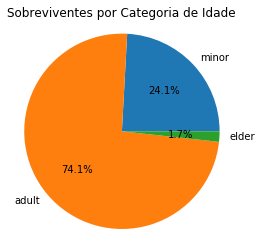

In [31]:
plt.pie(fracs, autopct='%1.1f%%', labels = age_labels)
plt.title('Sobreviventes por Categoria de Idade');
plt.axis('square');

Portanto, notamos que a maioria dos sobreviventes eram adultos (74,4%) e que apenas 1.7% entre os sobreviventes eram idosos.

   #### P2.3 Combinando as categorias criadas acima e as diferenças de sexo, podemos identificar qual categoria de idade e sexo mais teve "êxito" na sobrevivência? Há alguma explicação plausível para esse resultado?

Vamos usar `groupby()` para obter outro dataframe onde a categoria de idade e o sexo são índices, e em seguida vamos observar o aspecto do resultado:

In [32]:
survived_by_age_sex = df_titanic_with_ages.groupby(['age_group', 'sex']).agg('count')
survived_by_age_sex

survived  pclass  age  sibsp  parch  fare  embarked
age_group sex                                                        
minor     female        46      46   46     46     46    46        46
          male          24      24   24     24     24    24        24
adult     female       148     148  148    148    148   148       147
          male          67      67   67     67     67    67        67
elder     female         3       3    3      3      3     3         2
          male           2       2    2      2      2     2         2

Agora, vamos obter alguns parâmetros úteis para plotar a composição de homens e mulheres dentro de cada grupo de idade, plotando os valores em seguida: 

In [33]:
list(survived_by_age_sex.query('sex == "male"')['survived'])

[24, 67, 2]

In [34]:
len(age_labels)

3

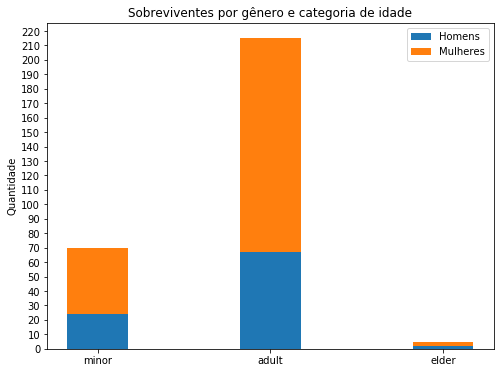

In [35]:
ind = np.arange(len(age_labels))
men_surv_by_age = list(survived_by_age_sex.query('sex == "male"')['survived'])
women_surv_by_age = list(survived_by_age_sex.query('sex == "female"')['survived'])
width = 0.35

plt.figure(figsize = (8,6));
p1 = plt.bar(ind, men_surv_by_age, width)
p2 = plt.bar(ind, women_surv_by_age, width, bottom=men_surv_by_age)

plt.ylabel('Quantidade')
plt.title('Sobreviventes por gênero e categoria de idade')
plt.xticks(ind, age_labels)
plt.yticks(np.arange(0, 230, 10))
plt.legend((p1[0], p2[0]), ('Homens', 'Mulheres'));


Portanto, nossa resposta é: entre os sobreviventes, a maior parcela é de adultos mulheres, seguidas dos adultos homens. Em seguida temos o grupo de menores de 18 anos (dentre os quais mais mulheres sobreviveram). Por fim (e como já evidenciamos no gráfico anterior), a quantidade de idosos sobreviventes é muito menor do que as outras parcelas: fato que pode ser evidenciado pela dificuldade de usar esforço físico no momento de fuga do navio e pelo fato de que os primeiros passageiros a fugirem nos barcos de fuga eram crianças e mulheres.

Entretanto, algumas pesquisas pela [internet](https://www.livescience.com/19694-women-children-titanic-sinking.html) levam a crer que esse comportamento da tripulação (de determinar a prioridade de mulheres e crianças) não era a regra em outros afundamentos de navios. 

### 3. Sobrevivência e classe social (avaliada pela proxy "ticket class")


   #### P3.1 Dentre os sobreviventes, qual classe social teve maior "êxito"? E qual teve o pior?

Relembrando o método `groupby` sobre o já obtido dataframe de sobreviventes:

In [36]:
df_titanic_surv.groupby('pclass').agg('count')

,survived,sex,age,sibsp,parch,fare,embarked
pclass,,,,,,,
1,136,136,122,136,136,136,134
2,87,87,83,87,87,87,87
3,119,119,85,119,119,119,119


In [37]:
surv_by_class = df_titanic_surv.groupby('pclass').agg('count')['survived']
surv_by_class_fracs = 100.*np.true_divide(surv_by_class, sum(surv_by_class))
surv_by_class_fracs

pclass
1    39.766082
2    25.438596
3    34.795322
Name: survived, dtype: float64

Notamos que entre os sobreviventes 39,8% eram da primeira classe, parcela bem próxima da fração de sobreviventes que estavam na 3ª classe (34,8%).

   #### P3.2 Qual a resposta da pergunta acima para os não-sobreviventes?

Vamos obter um dataframe apenas com os que faleceram na tragédia e agrupar em quantidade por classe:

In [38]:
df_titanic_notsurv = df_titanic.query('survived == 0')

In [39]:
df_titanic_notsurv.groupby('pclass').agg('count')

,survived,sex,age,sibsp,parch,fare,embarked
pclass,,,,,,,
1,80,80,64,80,80,80,80
2,97,97,90,97,97,97,97
3,372,372,270,372,372,372,372


In [40]:
notsurv_by_class = df_titanic_notsurv.groupby('pclass').agg('count')['survived']
notsurv_by_class_fracs = 100.*np.true_divide(notsurv_by_class, sum(notsurv_by_class))
notsurv_by_class_fracs

pclass
1    14.571949
2    17.668488
3    67.759563
Name: survived, dtype: float64

Aqui notamos que, entre os não sobreviventes, 67,8% eram da terceira classe, enquanto as outras duas classes tem frações bem inferiores.

   #### P3.3 As respostas das duas perguntas anteriores são plausíveis, dadas as separações físicas das classes no Titanic? 

Sim. Como ilustrado na resposta da pergunta P1, a terceira classe ficava nos decks mais inferiores do navio enquanto a primeira classe ficava nos decks mais superiores, portanto deixando-os mais próximos do acesso aos botes de fuga. Isso pode ter influenciado na quantidade de sobreviventes em cada classe.

   #### P3.4 Qual sexo é "dominante" em cada classe de sobreviventes?

Basta agruparmos o dataframe dos sobreviventes por `pclass` e `sex` e agregar usando o argumento `count`:

In [41]:
df_titanic_surv.groupby(['pclass', 'sex']).agg('count')

survived  age  sibsp  parch  fare  embarked
pclass sex                                                
1      female        91   82     91     91    91        89
       male          45   40     45     45    45        45
2      female        70   68     70     70    70        70
       male          17   15     17     17    17        17
3      female        72   47     72     72    72        72
       male          47   38     47     47    47        47

O sexo dominante entre sobreviventes, em qualquer classe, é o feminino. 

   #### P3.5 Qual a média de preço paga por cada classe?

Aqui basta agrupar novamente por `pclass` e usar `describe()` na coluna `fare` para obter as médias:

In [42]:
df_titanic_surv.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,136.0,95.608029,85.286820,25.9292,50.98545,77.9583,111.481225,512.3292
2,87.0,22.055700,10.853502,10.5000,13.00000,21.0000,26.250000,65.0000
3,119.0,13.694887,10.692993,0.0000,7.77500,8.5167,15.875000,56.4958


In [43]:
fare_by_class = list(df_titanic_surv.groupby('pclass').mean()['fare'])
print('média de preço paga por cada classe:\n1ª Classe {:2.2f}\n2ª Classe {:2.2f}\n3ª Classe {:2.2f}'.format(fare_by_class[0],fare_by_class[1],fare_by_class[2]))

média de preço paga por cada classe:
1ª Classe 95.61
2ª Classe 22.06
3ª Classe 13.69


Notamos, pois, que o preço médio das passagens acompanha o "conforto" gradual da 3ª classe para a 1ª. Por fim, notamos que na avaliação do `describe()`, anteriormente, a distribuição de preços de passagem não parecem muito concentradas, especialmente para a primeira classe, onde a maior passagem paga foi de 521.33, enquanto a menor foi de 25.93. Vejamos o histograma para este caso:

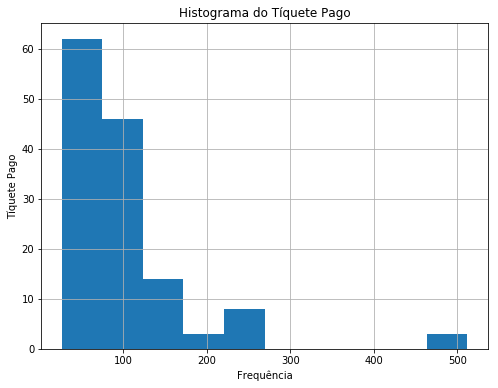

In [92]:
df_titanic_surv.query('pclass == 1').hist(column = 'fare',figsize=(8,6))
plt.xlabel('Frequência')
plt.ylabel('Tíquete Pago')
plt.title('Histograma do Tíquete Pago');

De fato, apesar da média de preço ser de 95.61, há uma certa quantidade de tarifas acima da média. Mais precisamente:

In [45]:
high_fares = df_titanic_surv.query('pclass == 1 & fare >= 95.608029').shape[0]
print('{:2.2f}% das passagens de primeira classe são maiores que a média'.format(100*float(high_fares)/float(df_titanic_surv.query('pclass == 1').shape[0])))

28.68% das passagens de primeira classe são maiores que a média


É uma quantidade considerável, de fato. 

### 4. Sobrevivência e família
   #### 4.1 O fato de certas pessoas terem a bordo mais parentes (de qualquer tipo) influenciou na sobrevivência das mesmas?

Vamos criar sobre o dataframe `df_titanic_surv` uma nova coluna que contabiliza o número de parentes (`sibsp`+`parch`), chamada `relatives`:

In [46]:
column_relatives = df_titanic_surv['sibsp'] + df_titanic_surv['parch']


In [47]:
df_titanic_surv = df_titanic_surv.assign(relatives = column_relatives)

In [48]:
df_surv_by_relatives = df_titanic_surv.groupby('relatives').agg('count')['survived']

In [49]:
df_surv_by_relatives

relatives
0    163
1     89
2     59
3     21
4      3
5      3
6      4
Name: survived, dtype: int64

In [50]:
total = df_surv_by_relatives.sum()
df_surv_by_relatives = 100.*np.true_divide(df_surv_by_relatives, total)
df_surv_by_relatives

relatives
0    47.660819
1    26.023392
2    17.251462
3     6.140351
4     0.877193
5     0.877193
6     1.169591
Name: survived, dtype: float64

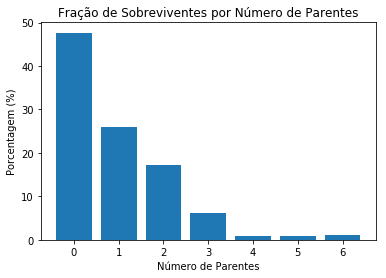

In [51]:
n = df_surv_by_relatives.shape[0]
x_types = list(df_surv_by_relatives.index)
x_positions = list(range(len(x_types))) 
plt.bar(x_positions, list(df_surv_by_relatives))
plt.xlabel('Número de Parentes')
plt.ylabel('Porcentagem (%)')
plt.xticks(x_positions, x_types)
plt.title('Fração de Sobreviventes por Número de Parentes');


O gráfico nos mostra que, entre os sobreviventes, quanto maior o número de parentes, menor foi a quantidade de sobreviventes. Cerca de 48% dos sobreviventes não possuíam nenhum parente a bordo (`relatives = 0`), enquanto os 52% restantes possuíam pelo menos um parente a bordo (`relatives > 0`). Isso nos evidencia uma provável propensão dos passageiros com parentes a bordo a não sobreviverem, porque ao tentar ajudar/procurar os demais parentes perderam a chance de escapar e sobreviver.

### 5. Sobrevivência e Local de Embarque
   #### 5.1 Quantos são os sobreviventes por local de embarque? Esse fator parece ter alguma relação _de fato_ com a propensão de uma pessoa sobreviver? 

No tópico de exploração de dados, vimos que há dois dados faltantes para o atributo `embarked`. Vamos criar um dataframe sem essas duas linhas para analisar a pergunta em questão: 

In [52]:
df_titanic_with_embarked = df_titanic_surv[pd.notnull(df_titanic_surv['embarked'])]

In [53]:
df_surv_by_embarkment = df_titanic_with_embarked.groupby('embarked').agg('count')['survived']
df_surv_by_embarkment

embarked
C     93
Q     30
S    217
Name: survived, dtype: int64

Acima temos o número de sobreviventes por local de embarque. Vamos obter os valores percentuais e plotar. Entretanto, dessa vez vamos criar uma função que plota um gráfico de barras dos valores únicos de um atributo qualquer repassado à função, para treinar a generalização:

In [54]:
def plot_label_uniquevalues_perc(dataframe, xcolumn, ycolumn, x_types, xlabel, title):
    '''
    Função que plota um gráfico de barras com as porcentagens de valores para um dado atributo em relação a categoria de valores únicos de outro atributo 
    Argumentos:
        dataframe: DataFrame com o conjunto de dados
        xcolumn: string com a label da variável para a qual se deseja definir as categorias de valores únicos
        ycolumn: string com a label da coluna da variável de interesse, para a qual se deseja obter as frações de valores em relação às categorias
        x_types: lista com as labels de cada categoria definida pela xcolumn
        xlabel: string com a legenda do eixo x do gráfico
        title: string com o título do gráfico
    Retorna:
        Plota um gráfico com plt.bar() das frações de valores para cada categoria definida
    '''
    # pegar apenas as linhas com valores não nulos para a xcolumn 
    df_with_nonnull = dataframe[pd.notnull(dataframe[xcolumn])]
    # obter um dataframe agroupado por xcolumn com os respectivos valores observados para ycolumn 
    df_by_label_category = dataframe.groupby(xcolumn).agg('count')[ycolumn]
    # obter o total de contagens e transformar as contagens em frações do total em porcentagem
    total = df_by_label_category.sum()
    df_by_label_category = 100.*np.true_divide(df_by_label_category, total)
    
    # plotar o gráfico
    n = df_by_label_category.shape[0]
    x_positions = list(range(len(x_types))) 
    plt.bar(x_positions, list(df_by_label_category))
    plt.xlabel(xlabel)
    plt.ylabel('Porcentagem (%)')
    plt.xticks(x_positions, x_types)
    plt.title(title);

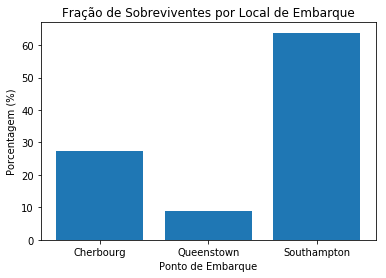

In [94]:
x_types = ['Cherbourg', 'Queenstown', 'Southampton']
xlabel = 'Ponto de Embarque'
title = 'Fração de Sobreviventes por Local de Embarque'
plot_label_uniquevalues_perc(df_titanic_surv, 'embarked', 'survived', x_types, xlabel, title)

A princípio, nos parece que aqueles que embarcaram em Southampton tiveram mais sucesso entre os sobreviventes. Entretanto, não parece tão lógico que apenas o local de embarque tenha sido um fator relevante na propensão à sobrevivência. Uma possível razão para isso é que uma quantidade maior de pessoas tenham embarcado em Southampton, de forma que seja mais natural a maioria deles entre os sobreviventes. Vamos analisar isso vendo o número de passageiros por local de embarque, também em frações:

In [56]:
df_titanic.groupby('embarked').agg('count')

,survived,pclass,sex,age,sibsp,parch,fare
embarked,,,,,,,
C,168,168,168,130,168,168,168
Q,77,77,77,28,77,77,77
S,644,644,644,554,644,644,644


In [57]:
# tomar uma coluna qualquer para pegar apenas a contagem de valores
series_by_embarked = df_titanic.groupby('embarked').agg('count')['survived']
series_by_embarked = 100.*np.true_divide(series_by_embarked, series_by_embarked.sum())
series_by_embarked

embarked
C    18.897638
Q     8.661417
S    72.440945
Name: survived, dtype: float64

De fato! Da mesma forma como cerca de 72% dos passageiros embarcaram em Southampton, seguido de cerca 19% em Cherbourg e 9% em Queenstown, as frações entre os sobreviventes obedecem cerca da mesma gradação. Ou seja, o local de embarque não indica ter tido muita relevância na propensão à sobrevivência, como pensávamos antes. As proporções não se alteraram muito.

# 5. Conclusões  

Após toda a exploração de dados anterior, podemos levantar as conclusões mais relevantes sobre a relação dos atributos de cada passageiro/tripulante com a sua sobrevivência ou falecimento. Dentre elas, as 4 mais pertinentes são listadas a seguir:

### Conclusão 1: O gênero feminino correspondeu a 70% dos sobreviventes do Titanic, apesar da maior propensão natural, em média, de homens a sobreviver em virtude de maior capacidade física para escapar do acidente. Uma possível razão para isso pode ter sido a priorização do acesso de mulheres aos botes salva-vidas.     

### Conclusão 2: Quando se observa as categorias de idade e gênero, nota-se que os sobreviventes são compostos majoritariamente de adultos e crianças, sendo os idosos representados por apenas 1,7% dos sobreviventes. Ademais, as mulheres adultas e crianças correspondem a 75% dos sobreviventes, evidenciando a mesma possível razão levantada anteriormente.

In [95]:
x = int(survived_by_age_sex.query('age_group == "adult" & sex == "female"')['survived'])
y = int(survived_by_age_sex.query('age_group == "minor"')['survived'].sum())
total = survived_by_agegroups['survived'].sum()

print('\nFração de mulheres adultas+crianças em relação ao total de sobreviventes (com "age" não nula): {:2.2f}%'.format(100*(x+y)/total))


Fração de mulheres adultas+crianças em relação ao total de sobreviventes (com "age" não nula): 75.17%


### Conclusão 3: A Classe de viagem teve significativa influência na não sobrevivência de pessoas. Entre os não sobreviventes, 67,8 % viajavam na terceira classe, enquanto 14,6% e 17,7% viajavam nas primeira e segunda classe, respectivamente. Como vimos na pergunta P1, o arranjo das cabines no navio privilegiava as maiores classes, deixando a terceira classe em decks inferiores do navio, e assim dificultando a fuga desses passageiros.

### Conclusão 4: O número de parentes a bordo teve uma significativa influência na propensão à sobrevivência. Viimos que 52% dos sobreviventes estavam viajando sem nenhum parente, enquanto os 48% possuíam pelo menos um parente a bordo.  

### Conclusão Final:

Notamos que alguns atributos parecem ter mais influência na propensão das pessoas à sobreviverem à tragédia do Titanic, mas em todas as análises anteriores não podemos afirmar com confiança significativa que algum dos atributos causou ou determinou a sobrevivência de alguém, pois as razões de cada sobrevivência foram não apenas guiadas por muitos outros fatores que não estão no nosso banco de dados, mas também porque os fatores cruciais para sobreviver foram distintos para cada pessoa.

O que podemos entender, apenas observando uma amostra do totao de sobreviventes, são as características mais comuns ao grupo e como elas se diferenciam daquelas do grupo de não sobreviventes. Podemos investigar mais a fundo sobre como poderíamos prever o resultado da sobrevivência de alguém apenas conhecendo os atributos vistos aqui, mas para isso precisaríamos construir uma análise bem mais robusta, usando regressões ou mesmo machine learning, mas não apenas análise de correlações. Por isso, nossas conclusões se limitam a descrever os resultados mais interessantes encontrados na amostra. 

# 6. Limitações

- A amostra de 821 pessoas representa cerca de 37% do total de 1503 de mortos na tragédia. Assim, não se pode tirar alguma conclusão acerca da consistência da amostra utilizada aqui em termos de representação do total, pois não se conhece qual foi o processo de obtenção dessa amostra. Ela pode estar, por exemplo, enviesada e conter muitas mulheres entre os sobreviventes, enviesando a conclusão de que mais mulheres sobreviveram. O fato de não se conhecer o grupo completo de passageiros torna a análise limitada, pois não nos permite obter outras amostras aleatórias para corroborar nossas conclusões.


- Neste projeto não contemplou-se muitas análises sobre os não-sobreviventes; focou-se nos sobreviventes. 

- Ao trabalharmos com a variável `age`, descartou-se as linhas paras as quais `age == 0`. Esse descarte não foi tão insignificante e pode ter impactos sobre a análise. O número de descartes foi:

In [104]:
x = df_titanic['age'].isnull().sum()
print('Descartou-se {:d} linhas das 821 linhas ou {:.1f}% do total.'.format(x, 100*x/821))

Descartou-se 177 linhas das 821 linhas ou 21.6% do total.


- A divisão de grupos de idade foi uma decisão de projeto, sendo uma limitação. A categoria `minors` poderia ser subdivida entre bebês e crianças maiores para buscar separar os primeiros, que não possuem capacidade própria de escaparem sós. A divisão em apenas 3 categorias é uma limitação da análise.

- No conjunto da amostra tivemos dados faltantes nas seguintes variáveis: `age`, `cabin` e `embarked`. A variável `cabin` não se mostrou útil, pois poderia servir de proxy para status social, mas as variáveis `pclass` e `fare` já possuem essa informação, e apenas pelas strings de `cabin` não podemos identificar classes. Isso limitou o uso desse atributo. 

- O atributo acima poderia ser utilizado caso se conhecesse, a priori, como cada cabine se posiciona no mapa do navio. Isso porque poderíamos investigar o grau de sobrevivência através de várias partes do navio para entender quais regiões tiveram maiores ou menores privilégios no momento de escapar.

- As análises feitas nesse projeto são de cunho descritivo. Uma abordagem mais profunda dos dados envolveria modelos de previsão da propensão de pressoas sobreviverem à tragédia, enquanto as medidas descritivas só ilustram como a amostra é. Esta é outra limitação que não nos permite ter alguma certeza maior sobre as conclusões levantadas aqui.

# 7. Comunicação dos Resultados

Vamos expor as conclusões acima com gráficos (alguns já obtidos anteriormente)

### Conclusão 1:  O gênero feminino correspondeu a 70% dos sobreviventes do Titanic

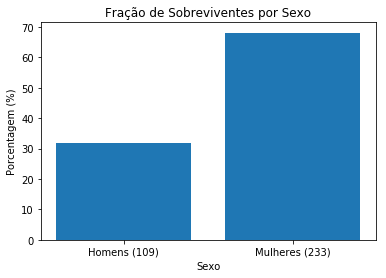

In [62]:
numbers_by_sex = df_titanic_surv.groupby('sex').agg('count')['survived']
x_types = ['Homens ({})'.format(numbers_by_sex[1]), 'Mulheres ({})'.format(numbers_by_sex[0])]
x_positions = list(range(len(x_types))) 
plt.bar(x_positions, sex_fractions)
plt.xlabel('Sexo')
plt.ylabel('Porcentagem (%)')
plt.xticks(x_positions, x_types)
plt.title('Fração de Sobreviventes por Sexo');

O gráfico acima ilustra a porcentagem de homens e mulheres entre os sobreviventes da amostra, onde notamos que a quantidade de mulheres (233) somaram mais do que o **dobro** do número de homens (109). Isso evidencia a priorização das mulheres na alocação de pessoas nos botes salva-vidas, uma vez que caso a alocação tivesse acontecido sem qualquer "regra" (neste caso, priorizar mulheres), esperava-se que os homens ocupassem uma parcela maior dos sobreviventes, já que possuem mais força física em média. 

### Conclusão 2: os sobreviventes são compostos majoritariamente de adultos e crianças, sendo os idosos representados por apenas 1,7% dos sobreviventes

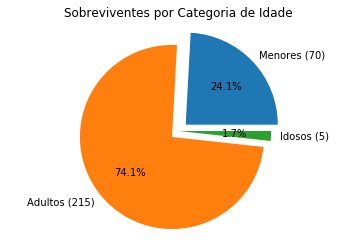

In [71]:
n_agegroup = survived_by_agegroups['survived']
explode = (0.1, 0.1, 0)
plt.pie(fracs, explode=explode, autopct='%1.1f%%', labels = ['Menores ({})'.format(n_agegroup[0]), 'Adultos ({})'.format(n_agegroup[1]), 'Idosos ({})'.format(n_agegroup[2])])
plt.axis('equal')
plt.title('Sobreviventes por Categoria de Idade');
plt.show()


No gráfico acima, temos um total de 290 sobreviventes, pois aqueles com idade ausente foram descartados da análise. Nota-se, de fato, que os adultos constituem quase 75% dos sobreviventes, acompanhado dos menores (com quase 25%). Os 5 idosos perfazem apenas 1,7% do total de sobreviventes, o que evidencia o fato de que o grupo de idosos (considerados aqueles com mais de 60 anos) tem muito menos capacidade física do que os adultos e crianças em geral.

### Conclusão 3: Entre os sobreviventes, a primeira classe representa cerca de 40%. Entre os não sobreviventes, 67,8 % viajavam na terceira classe, enquanto 14,6% e 17,7% viajavam nas primeira e segunda classe, respectivamente

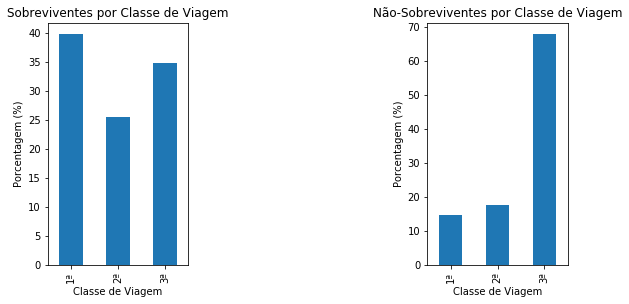

In [64]:
plt.figure(1)
plt.subplot(1,3,1)
surv_by_class_fracs.plot.bar(figsize= (8.5,4))
plt.xticks([0, 1, 2], ['1ª','2ª','3ª'])
plt.xlabel('Classe de Viagem')
plt.ylabel('Porcentagem (%)')
plt.title('Sobreviventes por Classe de Viagem')

plt.subplot(1,3,3)
notsurv_by_class_fracs.plot.bar()
plt.xticks([0, 1, 2], ['1ª','2ª','3ª'])
plt.xlabel('Classe de Viagem')
plt.ylabel('Porcentagem (%)')
plt.title('Não-Sobreviventes por Classe de Viagem')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35) # referências tomadas de um link do stackoverflow (mais abaixo) para evitar sobrepor as labels

Entre os sobreviventes, no primeiro gráfico, percebemos como a primeira classe teve maiores privilégios no momento de fuga do Titanic, constituindo 40% dos sobreviventes, sendo um deles o posicionamento das cabines dessa categoria (como mostra a figura a seguir, mencionada anteriormente). No segundo gráfico, que mostra a composição dos não-sobreviventes por classe, percebemos uma disparidade maior: a terceira classe, cujas cabines localizavam-se nos decks mais inferiores do navio, foi a mais prejudicada e representou quase 70% dos que faleceram na tragédia.

### Conclusão 4: O número de parentes a bordo teve uma significativa influência na propensão à sobrevivência. 52% dos sobreviventes estavam viajando sem nenhum parente, enquanto os 48% possuíam pelo menos um parente a bordo.

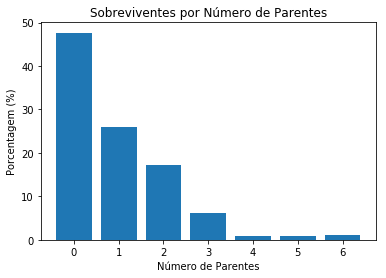

In [67]:
x_types = list(range(7))
xlabel = 'Número de Parentes'
title = 'Sobreviventes por Número de Parentes'
plot_label_uniquevalues_perc(df_titanic_surv, 'relatives', 'survived', x_types, xlabel, title)

Vejamos as quantidades absolutas:

In [80]:
df_surv_by_relatives

relatives
0    47.660819
1    26.023392
2    17.251462
3     6.140351
4     0.877193
5     0.877193
6     1.169591
Name: survived, dtype: float64

De fato, a relação inversa entre o aumento do número de parentes a bordo e a respectiva quantidade de sobreviventes é clara, evidenciando a crescente dificuldade das pessoas sobreviverem quando têm parentes a bordo, pois normalmente elas tentarão salvar algum deles e isto poderá custar suas vidas. Para aqueles com mais de 2 parentes a bordo, a quantidade de sobreviventes diminui drasticamente e perfazem apenas cerca de 9% dos sobreviventes, enquanto aqueles sem nenhum parente a bordo representam 47,7% de todos os sobreviventes da amostra. 

# 8. Referências

https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers

https://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

https://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-per-group-and-other-statistics-in-pandas-group-by

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html

https://stackoverflow.com/questions/37514686/how-to-plot-a-bar-graph-from-a-pandas-series

https://matplotlib.org/gallery/pyplots/pyplot_scales.html#sphx-glr-gallery-pyplots-pyplot-scales-py

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html

https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan

https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html

https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py